## Wprowadzenie do OpenCV

Kilka podstawowych rzeczy, które należy wiedzieć o OpenCV - na przykładach.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Podstawowym obiektem w pythonowskim API OpenCV jest tablica NumPy. Najczęściej bywają typu `uint8` (0-255), ale można pracować na obrazach `float32` (0.0-1.0) lub innych - niektóre funkcje oczekują konkretnych typów na wejściu i należy zwracać na to uwagę.

Za input/output odpowiadają funkcje [`cv2.imread`](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) i [`cv2.imwrite`](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce).
Dokumentacja OpenCV dotyczy implementacji C++, ale z reguły będziesz w stanie wydedukować o co chodzi (`const String &` == `str`, itd).

In [3]:
img = cv2.imread('../Dane1-4/Lena.jpg')
print(type(img))
print(img.dtype)

<class 'numpy.ndarray'>
uint8


Obrazy monochromatyczne mają dwa wymiary (szerokość i wysokość), dla obrazów kolorowych dochodzi trzeci wymiar, tzw. _kanał_, kodujący w określony sposób informację o kolorze. Domyślną przestrzenią barw w OpenCV jest BGR (nie mylić z RGB), ale możemy przechodzić między różnymi innymi przestrzeniami.

In [4]:
img.shape

(512, 514, 3)

Proste operacje na obrazach przeprowadzamy jak na zwykłych macierzach. Np. aby wybrać pojedynczy kanał obrazu:

In [5]:
red = img[..., 2] # 0 - Blue, 1 - Green, 2 - Red
red.shape

(512, 514)

Albo, by wyciąć fragment obrazu:

In [6]:
crop = img[210:310, 220:370, :]
crop.shape # wynik nie jest kopią, a widokiem - może być użyteczne

(100, 150, 3)

Możesz stworzyć nowy obraz tak, jak każdą inną macierz numpy. Pamiętaj jednak o poprawnym układzie wymiarów i typie danych!

In [7]:
nowy = np.zeros((32, 32), dtype=np.uint8)
nowy

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

OpenCV ma wbudowane funkcje do wyświetlania, [`cv2.imshow`](https://docs.opencv.org/3.4/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563) i powiązaną [`cv2.waitKey`](https://docs.opencv.org/3.4/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7), ale nadają się one bardziej do pisania samodzielnych aplikacji niż pracy w notebookach, gdyż powodują one wyświetlenie osobnego okna.
Do wyświetlania obrazów w notebookach możesz skorzystać z `PIL.Image` albo `matplotlib.pyplot.imshow`.

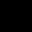

In [8]:
Image.fromarray(nowy)

`PIL.Image` oczekuje obrazów monochromatycznych albo RGB, więc w przypadku obrazów kolorowych pamiętaj o konwersji do odpowiedniej przestrzeni!

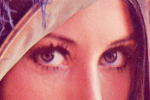

In [9]:
Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

Więcej możliwości poznasz na zajęciach oraz we własnym zakresie.

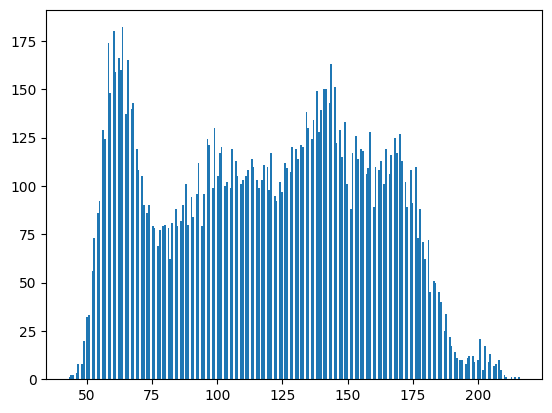

In [10]:
plt.hist(crop[..., 0].flatten(), bins=255);